In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation
from keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

X=pd.read_csv('X.csv',sep=' ', header=None, dtype=float)
X=X.values

y=pd.read_csv('y_bush_vs_others.csv',header=None)
y_bush=y.values.ravel()
z=pd.read_csv('y_williams_vs_others.csv',header=None)
y_williams=z.values.ravel()

C:\Users\niles\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Reshaping
X_new=[]
for i in range(len(X)):
    X_new.append(np.reshape(X[i],(64,64,1)))
X_new1=np.array(X_new)

#plt.imshow(X_new1[0])


In [3]:
type(X_new1[0][0][0][0])
X_new1.shape

(13233, 64, 64, 1)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X_new1, y_bush,test_size=1./3 , random_state=int('5042'),shuffle = True,stratify=y_bush)


In [5]:

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3,3), input_shape = (64, 64, 1), activation = 'relu'))
# Step 2 - Poolin#g
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
#classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))
#classifier.add(Dense(units = 1, activation = 'sigmoid'))6666666666666

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [6]:
# Part 2 - Fitting the CNN to the images
#training_set = train_datagen.flow_from_directory(x_train,target_size = (64, 64),batch_size = 32,class_mode = 'binary')
#test_set = test_datagen.flow_from_directory(x_test,target_size = (64, 64),batch_size = 32,class_mode = 'binary')
classifier.fit(x_train,y_train,epochs = 10, batch_size=100)


Epoch 1/10
8822/8822 [==============================] - 32s 4ms/step - loss: 0.2233 - acc: 0.9600
Epoch 2/10
8822/8822 [==============================] - 32s 4ms/step - loss: 0.1521 - acc: 0.9600
Epoch 3/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.1223 - acc: 0.9600
Epoch 4/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0884 - acc: 0.9600
Epoch 5/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0674 - acc: 0.9666
Epoch 6/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0556 - acc: 0.9752
Epoch 7/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0443 - acc: 0.9832
Epoch 8/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0356 - acc: 0.9889
Epoch 9/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0311 - acc: 0.9915
Epoch 10/10
8822/8822 [==============================] - 30s 3ms/step - loss: 0.0286 - acc: 0.9941


In [7]:
y_pred = classifier.predict_classes(x_test)
x_pred = classifier.predict_classes(x_train)
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(f1_score(y_train,x_pred))


[[4233    1]
 [ 122   55]]
0.9821428571428571
0.3107344632768362
0.4721030042918455
0.9649122807017544


In [8]:
#Model Save

classifier.save('my_model_BUSH_New.h5')  # creates a HDF5 file 'my_model.h5'
#del classifier  # deletes the existing model

# returns a compiled model
# identical to the previous one
classifier2 = load_model('bush.h5')
#print(classifier2)


In [9]:
print(classifier2.layers[0].get_config)
# evaluate loaded model on test data 
# Define X_test & Y_test data first
classifier2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = classifier2.evaluate(x_test, y_test, verbose=0)
print ("%s: %.2f%%" % (classifier2.metrics_names[0], score[1]*100))
print ("%s: %.2f%%" % (classifier2.metrics_names[1], score[1]*100))
y_pred = classifier2.predict_classes(x_test)
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test,y_pred))



<bound method Conv2D.get_config of <keras.layers.convolutional.Conv2D object at 0x000002084B48A940>>
loss: 98.14%
acc: 98.14%
[[4221   13]
 [  69  108]]
0.8925619834710744
0.6101694915254238
0.7248322147651007


In [10]:
#print(classifier2.summary())
#print(classifier2.get_weights())
#weights = classifier2.layers[0].get_weights()
#print(weights)
classifier2.get_input_shape_at(0)
      

(None, 64, 64, 1)

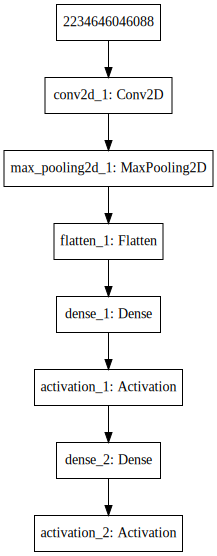

In [11]:
#Plot loaded model
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(classifier2, to_file='model.pdf')
SVG(model_to_dot(classifier2).create(prog='dot', format='svg'))

In [22]:
#Williams

x_train_williams,x_test_williams,y_train_williams,y_test_williams=train_test_split(X_new1, y_williams,test_size=1./3 , random_state=int('5042'),shuffle = True,stratify=y_williams)


In [23]:
# Initialising the CNN
classifier_will = Sequential()
# Step 1 - Convolution
classifier_will.add(Conv2D(8, (3,3), input_shape = (64, 64, 1), activation = 'relu'))
# Step 2 - Pooling
classifier_will.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
#classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier_will.add(Flatten())
# Step 4 - Full connection
classifier_will.add(Dense(units=16, activation='relu'))
#classifier_will.add(Activation('tanh'))
classifier_will.add(Dense(1))
classifier_will.add(Activation('sigmoid'))
#classifier.add(Dense(units = 1, activation = 'sigmoid'))6666666666666

# Compiling the CNN
classifier_will.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier_will.fit(x_train_williams,y_train_williams,epochs = 10, batch_size=100)

Epoch 1/10
8822/8822 [==============================] - 9s 1ms/step - loss: 0.0335 - acc: 0.9903
Epoch 2/10
8822/8822 [==============================] - 8s 942us/step - loss: 0.0174 - acc: 0.9960 2s - l
Epoch 3/10
8822/8822 [==============================] - 8s 948us/step - loss: 0.0134 - acc: 0.9957 2s - los
Epoch 4/10
8822/8822 [==============================] - 8s 945us/step - loss: 0.0109 - acc: 0.9963
Epoch 5/10
8822/8822 [==============================] - 8s 950us/step - loss: 0.0090 - acc: 0.9971
Epoch 6/10
8822/8822 [==============================] - 8s 949us/step - loss: 0.0076 - acc: 0.9972
Epoch 7/10
2400/8822 [=======>......................] - ETA: 6s - loss: 0.0082 - acc: 0.9971

In [ ]:
y_pred_williams = classifier_will.predict_classes(x_test_williams)
x_pred_williams= classifier_will.predict_classes(x_train_williams)
#print(y_pred_williams)

In [ ]:
print(confusion_matrix(y_test_williams, y_pred_williams))
print(precision_score(y_test_williams, y_pred_williams))
print(recall_score(y_test_williams, y_pred_williams))
print(f1_score(y_test_williams,y_pred_williams))
print(f1_score(y_train_williams,x_pred_williams))


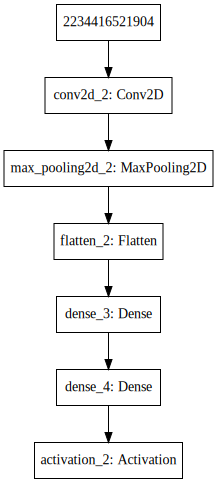

In [17]:
#Plot
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(classifier_will, to_file='model.pdf')
SVG(model_to_dot(classifier_will).create(prog='dot', format='svg'))

In [18]:
#Model Save

classifier_will.save('my_model_williams_NEW.h5')  # creates a HDF5 file 'my_model.h5'
#del classifier  # deletes the existing model

# returns a compiled model
# identical to the previous one
classifier2_will = load_model('williams.h5')
print(classifier2_will)


In [19]:
#Model Load
print(classifier2_will.layers[0].get_config)
# evaluate loaded model on test data 
# Define X_test & Y_test data first
classifier2_will.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = classifier2_will.evaluate(x_test_williams, y_test_williams, verbose=0)

print ("%s: %.2f%%" % (classifier2_will.metrics_names[0], score[1]*100))
print ("%s: %.2f%%" % (classifier2_will.metrics_names[1], score[1]*100))
y_pred_williams = classifier2_will.predict_classes(x_test_williams)
x_pred_williams = classifier2_will.predict_classes(x_train_williams)
print(confusion_matrix(y_test_williams, y_pred_williams))
print(precision_score(y_test_williams, y_pred_williams))
print(recall_score(y_test_williams, y_pred_williams))
print(f1_score(y_test_williams, y_pred_williams))
print(f1_score(y_train_williams,x_pred_williams))

<bound method Conv2D.get_config of <keras.layers.convolutional.Conv2D object at 0x000002084B674080>>
loss: 99.75%
acc: 99.75%
[[4394    0]
 [  11    6]]
1.0
0.35294117647058826
0.5217391304347826
0.9859154929577464


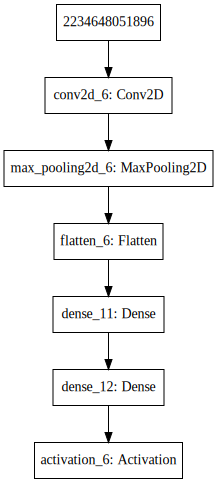

In [20]:
#Plot loaded model
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(classifier2_will, to_file='model.pdf')
SVG(model_to_dot(classifier2_will).create(prog='dot', format='svg'))

In [21]:
classifier2_will.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7688)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                123024    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 123,121
Trainable params: 123,121
Non-trainable params: 0
_________________________________________________________________
